In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install virtualenv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 32.9 MB/s eta 0:00:00


In [ ]:
!virtualenv myenv

created virtual environment CPython3.10.11.final.0-64 in 973ms
  creator CPython3Posix(dest=/content/myenv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==23.1.2, setuptools==67.7.2, wheel==0.40.0
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [ ]:
!source myenv/bin/activate


In [ ]:
!pip install --quiet --upgrade tensorflow_federated

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.5/558.5 kB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.4/359.4 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!deactivate


/bin/bash: deactivate: command not found


In [ ]:
!pip3 install virtualenv
!virtualenv content

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
created virtual environment CPython3.10.11.final.0-64 in 240ms
  creator CPython3Posix(dest=/content/content, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==23.1.2, setuptools==67.7.2, wheel==0.40.0
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [ ]:
!pip install --quiet --upgrade tensorflow_federated

In [ ]:
pip install --upgrade tensorflow-federated

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install nest_asyncio
import nest_asyncio
nest_asyncio.apply()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import collections
import time
import pickle

import tensorflow as tf
import tensorflow_federated as tff

tf.compat.v1.enable_v2_behavior()

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
from tensorflow.keras.layers import Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
ROOT_DIR = '/content/gdrive/My Drive/Colab Notebooks'
data_dir = os.path.join(ROOT_DIR, 'preprocessed_data')

CLUSTER_NO = 2      # for cluster 2, change 'num_clients_per_round' to 2, for others change to 3.

output_dir = os.path.join(ROOT_DIR, 'output')
os.makedirs(output_dir, exist_ok=True)

current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
current_output_dir = os.path.join(output_dir, current_time+'_cluster_{}'.format(CLUSTER_NO))
os.makedirs(current_output_dir, exist_ok=True)

log_dir = os.path.join(current_output_dir, 'logs')
os.makedirs(log_dir, exist_ok=True)

In [ ]:
residential_cluster_dict = {-1:[7, 11, 15, 18, 20],
                            0:[3, 5, 14], 
                            1:[4, 8, 9, 10, 13, 19], 
                            2:[6, 12]}

In [ ]:
residential_ids = residential_cluster_dict[CLUSTER_NO]
residential_ids

[6, 12]

In [ ]:
# Fixed here.
residential_ids = [7, 18, 5, 10, 13, 6]
valid_residential_ids = [11, 3, 4, 13, 19, 12]
# valid_residential_ids = [7, 18, 5, 10, 13, 6]

In [ ]:
time_range = ['2015-09-29','2017-09-29']

In [ ]:
residential_df_list = []

for residential_id in residential_ids:

    processed_data_file = os.path.join(data_dir, 'preprocessed_station_{}.csv'.format(residential_id))
    residential_df = pd.read_csv(processed_data_file, 
                          parse_dates=['datetime'], 
                          infer_datetime_format=True, 
                          index_col='datetime', 
                          low_memory=False)
    
    residential_df_list.append(residential_df)

In [ ]:
valid_residential_df_list = []

for residential_id in valid_residential_ids:

    processed_data_file = os.path.join(data_dir, 'preprocessed_station_{}.csv'.format(residential_id))
    residential_df = pd.read_csv(processed_data_file, 
                          parse_dates=['datetime'], 
                          infer_datetime_format=True, 
                          index_col='datetime', 
                          low_memory=False)
    
    valid_residential_df_list.append(residential_df)

In [ ]:
residential_df_dict = {}
for i, residential_id in enumerate(residential_ids):
    residential_df_dict[residential_id] = residential_df_list[i]

for i, residential_id in enumerate(valid_residential_ids):
    residential_df_dict[residential_id] = valid_residential_df_list[i]

In [ ]:
for residential_id in residential_ids:
    residential_df_dict[residential_id] = residential_df_dict[residential_id].resample('D').sum()

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1)) # normalize features (0 ~ 1)

In [ ]:
features = ['energy_kWh']
targets = ['energy_kWh']

In [ ]:
for residential_id in residential_ids:
    residential_df = residential_df_dict[residential_id]
    residential_df[features] = scaler.fit_transform(residential_df[features])

In [ ]:
#time_range = cluster_date_range_dict[CLUSTER_NO]

start_date = time_range[0]
end_date =  time_range[1]

train_data_dict = {}
valid_data_dict = {}

for residential_id in residential_ids:
    residential_df = residential_df_dict[residential_id]
    train_data_dict[residential_id] = residential_df.loc[start_date:end_date]
    # valid_data_dict[residential_id] = residential_df.loc[end_date:]

In [ ]:
# Fixed here.

for residential_id in valid_residential_ids:
    residential_df = residential_df_dict[residential_id]
    valid_data_dict[residential_id] = residential_df.loc[end_date:]

In [ ]:
window_size = 30
ahead = 1

In [ ]:
def window_dataset_for_tff(series, window_size, ahead=1, num_epochs=5, batch_size=256, shuffle_buffer=1000):

    def batch_format_fn(element):
        return collections.OrderedDict(
            x=tf.reshape(element[:-ahead], [window_size, len(features)]),
            y=tf.reshape(element[-ahead][0:len(targets)], [len(targets)]))

    # series = tf.expand_dims(series, axis=-1)
    dataset = tf.data.Dataset.from_tensor_slices(series.values)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.repeat(num_epochs)
    dataset = dataset.shuffle(shuffle_buffer)

    # dataset = dataset.map(lambda window: (window[:-ahead], window[-ahead]))
    dataset = dataset.map(batch_format_fn)

    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [ ]:
tff_train_data_dict = {}
tff_valid_data_dict = {}

# Fixed here.
for residential_id in residential_ids:

    train_data = train_data_dict[residential_id]
    # valid_data = valid_data_dict[residential_id] 

    tff_train_data_dict[residential_id] = window_dataset_for_tff(train_data, window_size, ahead)
    # tff_valid_data_dict[residential_id] = window_dataset_for_tff(valid_data, window_size, ahead)           

In [ ]:
# Fixed here.
for residential_id in valid_residential_ids:
    valid_data = valid_data_dict[residential_id]
    tff_valid_data_dict[residential_id] = window_dataset_for_tff(valid_data, window_size, ahead)  

In [ ]:
tff_valid_data = tff_valid_data_dict[valid_residential_ids[0]]
# dummy_batch = tf.nest.map_structure(lambda x: x.numpy(), next(iter(tff_valid_data)))

In [ ]:
# Choose hyperpameters
lstm_layers = [256, 128] 
dense_layers = [64, 32]
dropout = 0.1
recurrent_dropout = 0.1
merge_mode = 'concat'

# Statistics collector
log_train_mse = []
log_test_mse = []
log_train_mae = []
log_test_mae = []

# Input and output shapes of model
input_shape = [window_size, len(features)]
output_shape = len(targets)

In [ ]:
def create_bi_LSTM_model(input_shape, output_shape, lstm_layers, dropout, recurrent_dropout, merge_mode='concat'):

    model = Sequential()

    for i in range(len(lstm_layers)):
        if (i+1) == (len(lstm_layers)):
            model.add(Bidirectional(LSTM(lstm_layers[i], activation='tanh', dropout=dropout, recurrent_dropout=recurrent_dropout, return_sequences=True), merge_mode=merge_mode))
        else:
            model.add(Bidirectional(LSTM(lstm_layers[i], activation='tanh', dropout=dropout, recurrent_dropout=recurrent_dropout, return_sequences=True), input_shape=input_shape))    
   
    model.add(Flatten())
    
    for j in range(len(dense_layers)):
        model.add(Dense(dense_layers[j]))
        model.add(Dropout(dropout))
        
    model.add(Dense(output_shape))
    
    return model

loss = tf.keras.losses.Huber()                          # Cannot input this directly into "tff.learning.from_keras_model()"
metrics = [tf.keras.metrics.MeanAbsoluteError()]        # RuntimeError: Attempting to capture an EagerTensor without building a function.

def model_fn():
    
    model = create_bi_LSTM_model(input_shape, output_shape, lstm_layers, dropout, recurrent_dropout, merge_mode)
    
    return tff.learning.models.from_keras_model(
        model,
        # dummy_batch=dummy_batch,
        input_spec= tff_valid_data.element_spec,
        loss=tf.keras.losses.Huber(),
        metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [ ]:
!pip install --upgrade pip setuptools wheel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached setuptools-67.8.0-py3-none-any.whl (1.1 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
arviz 0.15.1 requires scipy>=1.8.0, but you have scipy 1.7.3 which is incompatible.
pymc 5.1.2 requires cachetools>=4.2.1, but you have cachetools 3.1.1 which is incompatible.


In [ ]:
!pip install --upgrade tensorflow-federated
 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
client_optimizer_func = tf.keras.optimizers.SGD(learning_rate=0.02)       # Cannot input this directly into "tff.learning.from_keras_model()"
server_optimizer_func = tf.keras.optimizers.SGD(learning_rate=1.0)        # ValueError: Tensor("SGD/learning_rate:0", shape=(), dtype=resource) must be from the same graph as Tensor("zeros_like:0", shape=(1, 1024), dtype=float32).

federated_averaging = tff.learning.algorithms.build_weighted_fed_avg(
    model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=0.02),
    server_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=1.0))

In [ ]:
type(federated_averaging)

tensorflow_federated.python.learning.templates.learning_process.LearningProcess

In [ ]:
# Load tensorboard
%load_ext tensorboard
%tensorboard --logdir '{log_dir}'

<IPython.core.display.Javascript object>

In [ ]:

summary_writer = tf.summary.create_file_writer(log_dir)

In [ ]:
federated_train_data = []
federated_valid_data = []

for residential_id in residential_ids:

    tff_train_data = tff_train_data_dict[residential_id]
    # tff_valid_data = tff_valid_data_dict[residential_id] 

    federated_train_data.append(tff_train_data)
    # federated_valid_data.append(tff_valid_data)

In [ ]:
federated_train_data[0]

<_PrefetchDataset element_spec=OrderedDict([('x', TensorSpec(shape=(None, 30, 1), dtype=tf.float64, name=None)), ('y', TensorSpec(shape=(None, 1), dtype=tf.float64, name=None))])>

In [ ]:
# Fixed here.
for residential_id in valid_residential_ids:
    tff_valid_data = tff_valid_data_dict[residential_id]
    federated_valid_data.append(tff_valid_data)

In [ ]:
def select_clients(data_length, current_index, client_size=3):

  selected_clients = []

  if current_index >= data_length:
    current_index = 0
    
  selected_clients.append(current_index)

  i = 1
  buf = current_index
  while len(selected_clients) < client_size:
    
    if (buf+i) < data_length:
      selected_clients.append(buf+i)  
    else:
      buf = 0
      i = 0
      selected_clients.append(buf)

    i+=1

  return selected_clients, current_index+1


In [ ]:
federated_evaluation = tff.learning.build_federated_evaluation(model_fn)

In [ ]:
state = federated_averaging.initialize()

In [ ]:
dir(state)

In [ ]:
START_ROUND = 0
NUM_ROUNDS = 5

In [ ]:
time_array = np.array([0])
time_array

In [ ]:
# state_file = os.path.join(current_output_dir,'state.pkl')
# with open(state_file, 'rb') as file:
#   state = pickle.load(file)

In [68]:

start_time = time.time()

current_index = 0
num_clients_per_round = 2
with summary_writer.as_default():
    for round_num in range(START_ROUND,(START_ROUND+NUM_ROUNDS)):

        selected_index, current_index = select_clients(len(federated_train_data), current_index, num_clients_per_round)
        selected_train_data = [federated_train_data[i] for i in selected_index]
        selected_valid_data = [federated_valid_data[i] for i in selected_index]

        print('round  {:2d}'.format(round_num))
        print('selected_index = {}'.format(selected_index))
        print('selected_clients = {}'.format([residential_ids[i] for i in selected_index]))

        state, train_metrics = federated_averaging.next(state, selected_train_data)
        print('train_metrics = {}'.format(train_metrics))
        log_train_mse.append(train_metrics['client_work']['train']['loss'])
        log_train_mae.append(train_metrics['client_work']['train']['mean_absolute_error'])

        # for name, value in train_metrics._asdict().items():
        #     tf.summary.scalar('train_' + str(name), value, step=round_num)

        for name, value in train_metrics['client_work']['train'].items():
            tf.summary.scalar('train_' + str(name), value, step=round_num)
        model_weights = federated_averaging.get_model_weights(state)
        test_metrics = federated_evaluation(model_weights, selected_valid_data)['eval']
        print('test_metrics  = {}'.format(test_metrics))
        log_test_mse.append(test_metrics['loss'])
        log_test_mae.append(test_metrics['mean_absolute_error'])

        # for name, value in test_metrics._asdict().items():
        #     tf.summary.scalar('test_' + str(name), value, step=round_num)

        for name, value in test_metrics.items():
            tf.summary.scalar('test_' + str(name), value, step=round_num)

end_time = time.time()
elapsed_time = end_time - start_time
time_array = np.append(time_array,[elapsed_time])

round   0
selected_index = [0, 1]
selected_clients = [7, 18]
train_metrics = OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('mean_absolute_error', 0.102846615), ('loss', 0.008686719), ('num_examples', 7020), ('num_batches', 28)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])
test_metrics  = OrderedDict([('mean_absolute_error', 0.45184293), ('loss', 0.18059067), ('num_examples', 31870), ('num_batches', 126)])
round   1
selected_index = [1, 2]
selected_clients = [18, 5]
train_metrics = OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('mean_absolute_error', 0.086550266), ('loss', 0.0063000433), ('num_examples', 7020), ('num_batches', 28)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])
test_metrics  = OrderedDict([('mean_absolute_error', 0.

In [ ]:
time_array

In [69]:
state_file = os.path.join(current_output_dir,'state.pkl')
with open(state_file, 'wb') as file:
    file.truncate()
    pickle.dump(state,file)

In [70]:
training_history_file = os.path.join(current_output_dir, 'training_history.txt')

with open(training_history_file, 'wb') as file_pi:

        training_history = [np.array(log_train_mse).flatten(),
                            np.array(log_test_mse).flatten(),
                            np.array(log_train_mae).flatten(),
                            np.array(log_test_mae).flatten()]
        pickle.dump(training_history, file_pi)

training_history = pickle.load(open(training_history_file, "rb"))
train_mse, test_mse, train_mae, test_mae = training_history

In [ ]:
a = np.random.rand(123)

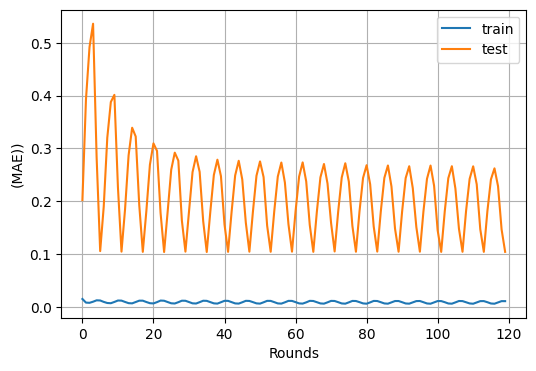

In [71]:
# Plot Huber
plt.figure(figsize=(6,4))
plt.plot(train_mse, label='train')
plt.plot(test_mse, label='test')
plt.xlabel('Rounds')
plt.ylabel('(MAE))')
plt.grid(True)
plt.legend()
img_path = os.path.join(current_output_dir, 'huber.png')
plt.savefig(img_path, dpi=300, bbox_inches = 'tight')
plt.show()

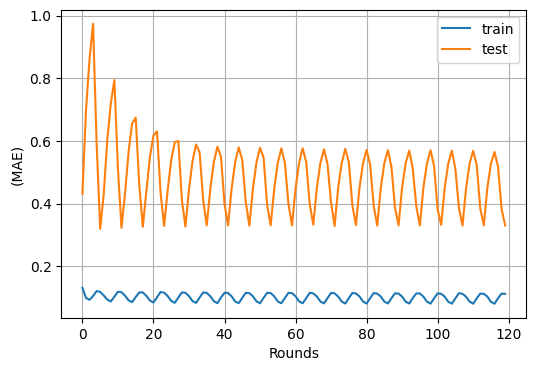

In [72]:
# Plot MAE
plt.figure(figsize=(6,4))
plt.plot(train_mae, label='train')
plt.plot(test_mae, label='test')
plt.xlabel('Rounds')
plt.ylabel('(MAE)')
plt.grid(True)
plt.legend()
img_path = os.path.join(current_output_dir, 'mae.png')
plt.savefig(img_path, dpi=300, bbox_inches = 'tight')
plt.show()

In [ ]:
# model_weights = federated_averaging.get_model_weights(state)
# federated_train_metrics = federated_evaluation(model_weights, federated_train_data)['eval']
# str(federated_train_metrics)
     

In [ ]:
# federated_train_metrics['mean_absolute_error']

In [ ]:
# model_weights = federated_averaging.get_model_weights(state)
# federated_valid_metrics = federated_evaluation(model_weights, federated_valid_data)['eval']
# str(federated_valid_metrics)

In [ ]:
# federated_valid_metrics['mean_absolute_error']

WEIGHT TRANSFER

In [ ]:
# model = create_bi_LSTM_model(input_shape, output_shape, lstm_layers, dropout, recurrent_dropout, merge_mode)
# model.compile(loss=loss, 
#               optimizer=client_optimizer_func,
#               metrics=["mae"])

In [ ]:
# model_weights = federated_averaging.get_model_weights(state)
# model.set_weights(model_weights.trainable)

In [ ]:
# model_path = os.path.join(current_output_dir, 'federated_and_clustered_model_mae_{}.h5'.format(str('%.4f'%(federated_valid_metrics['mean_absolute_error']))))
# tf.keras.models.save_model(model, model_path, save_format="h5")
    